## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
print(f"Количество пропущенных значений: {X.isnull().sum().sum()}")
X.dtypes
# все переменные колчиественные (в формате вещеcтвенных чисел) => категориальных переменных нет 

Количество пропущенных значений: 0


alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(241)
# в тестовую выборку сразу включим только ва признака (как указано в следующем задании)
X_train, X_test, y_train, y_test = train_test_split(X[["alcohol", "magnesium"]], y, test_size= 0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
output = pd.DataFrame (columns = ["NN", 'Train', 'Test'])
#  модель для k = 1
clf_1 = KNeighborsClassifier(n_neighbors=1, p = 2)
clf_1.fit(X_train, y_train)
y_predicted_1_test = clf_1.predict(X_test)
y_predicted_1_train = clf_1.predict(X_train)
accuracy_1_test = round(np.mean(y_test == y_predicted_1_test), 2)
accuracy_1_train = round(np.mean(y_train == y_predicted_1_train), 2)


#  модель для k = 3
clf_2 = KNeighborsClassifier(n_neighbors=3, p = 2)
clf_2.fit(X_train, y_train)
y_predicted_2_test = clf_2.predict(X_test)
y_predicted_2_train = clf_2.predict(X_train)
accuracy_2_test =  round(np.mean(y_test == y_predicted_2_test), 2)
accuracy_2_train = round(np.mean(y_train == y_predicted_2_train), 2)

#  модель для k = 5
clf_3 = KNeighborsClassifier(n_neighbors=5, p = 2)
clf_3.fit(X_train, y_train)
y_predicted_3_test = clf_3.predict(X_test)
y_predicted_3_train = clf_3.predict(X_train)
accuracy_3_test =  round(np.mean(y_test == y_predicted_3_test), 2)
accuracy_3_train = round(np.mean(y_train == y_predicted_3_train), 2)

#  модель для k = 10
clf_4 = KNeighborsClassifier(n_neighbors=10, p = 2)
clf_4.fit(X_train, y_train)
y_predicted_4_test = clf_4.predict(X_test)
y_predicted_4_train = clf_4.predict(X_train)
accuracy_4_test =  round(np.mean(y_test == y_predicted_4_test), 2)
accuracy_4_train = round(np.mean(y_train == y_predicted_4_train), 2)

#  модель для k = 15
clf_5 = KNeighborsClassifier(n_neighbors=15, p = 2)
clf_5.fit(X_train, y_train)
y_predicted_5_test = clf_5.predict(X_test)
y_predicted_5_train = clf_5.predict(X_train)
accuracy_5_test =  round(np.mean(y_test == y_predicted_5_test), 2)
accuracy_5_train = round(np.mean(y_train == y_predicted_5_train), 2)

#  модель для k = 25
clf_6 = KNeighborsClassifier(n_neighbors=25, p = 2)
clf_6.fit(X_train, y_train)
y_predicted_6_test = clf_6.predict(X_test)
y_predicted_6_train = clf_6.predict(X_train)
accuracy_6_test =  round(np.mean(y_test == y_predicted_6_test), 2)
accuracy_6_train = round(np.mean(y_train == y_predicted_6_train), 2)

# результаты для каждой модели на тренировочной и тестовой выборках
output_data = np.array(([1, accuracy_1_train, accuracy_1_test],
                        [3, accuracy_2_train, accuracy_2_test],
                        [5, accuracy_3_train, accuracy_3_test],
                        [10, accuracy_4_train, accuracy_4_test],
                        [15, accuracy_5_train, accuracy_5_test],
                        [25, accuracy_6_train, accuracy_6_test]
                       )
                      )

output = pd.DataFrame(output_data, columns = ["NN", 'Train', 'Test'])  # создаем таблицу для вывода
output["NN"] = output["NN"].astype("int64") # задаем колонку с k как число (чтобы не было точки, как у дроби)
print(output.to_string(index = False)) # вывод таблицы как строки. без колонки с индексом

 NN  Train  Test
  1   1.00  0.63
  3   0.81  0.69
  5   0.81  0.59
 10   0.80  0.70
 15   0.77  0.76
 25   0.73  0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

X_train**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

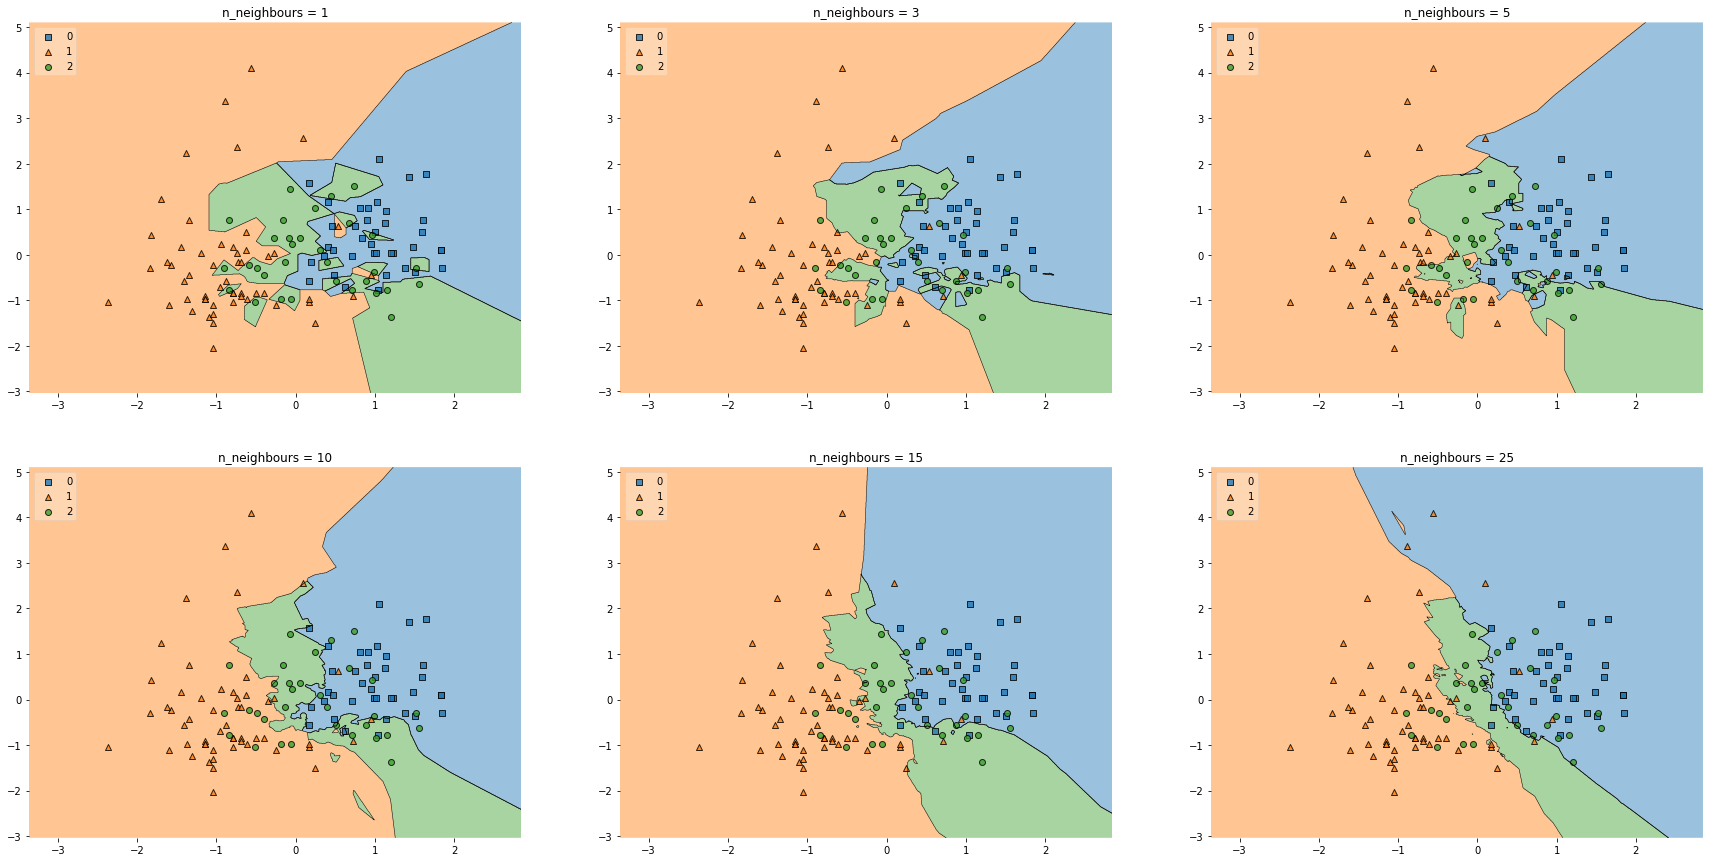

In [10]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3) # задаем размер сетки
fig = plt.figure(figsize=(30,15)) # задаем размер графиков

# список названий для 6 моделей
labels = ["n_neighbours = 1", "n_neighbours = 3", 
          "n_neighbours = 5", "n_neighbours = 10", 
          "n_neighbours = 15", "n_neighbours = 25"
         ]

# зипуем информацию для каждого графика (номер модели + название + положение на сетке графиков)
for clf, lab, grd in zip([clf_1, clf_2, clf_3, clf_4, clf_5, clf_6],
                         labels,
                         itertools.product([0,1,2], repeat = 2)):
    # для каждого классфификатора используем обучающую выборку
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]]) # задаем положение графика на сетке 
    fig = plot_decision_regions(X_train, y_train, clf=clf, legend=2) # строим график
    plt.title(lab) # задаем название 


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

На мой взгляд, оптимально использовать для обучения классификатора количество соседей равное 25. 
- Для k = 1 кривые, разделяющие поверхности, образуют максимально рваную плоскость. Например, в середине оранжевого класса вклинился объект, принадлежащий зеленому класса, что не логично, так как такой объект, судя по его ближайшим соседям должен быть отнесен именно к оранжевому классу. => такое k нас не устраивает
- Для k = 3, k = 5 также есть явные разрывы реашающих поверхностей (зеленый класс в центре синего или в оранжевом классе)
- Для k = 10 эта проблема меньше, но все равно имеются явные разрывы + зеленый класс также имеет перемычку, что разделяет его как бы на две части (что не очень логично тогда, если мы говорим об одном классе)
- Для k = 15 решающая поверхность становится полностью цельной для каждого класса, однако из-за недостаточного количества ближайших соседей наблюдаются перегибы кривых, что делает область зеленого класса не однороной (можем видеть, как объекты синего класса заходят в область зеленого, образуя синий класс, так как 10 их ближайших соседей принадлежат именно синему классу, однако логичнее было бы отнести данный объект к зеленому классу => нужно увеличить значение k)
- При k = 25 классы выглядят довольно согласовано, кривые, разделяющие поверхности, образуют аккуратную плоскость, и каждое отнесение какого-либо объекта к определенному классу при 25 ближайших соседях выглядт вполне логичным;


### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

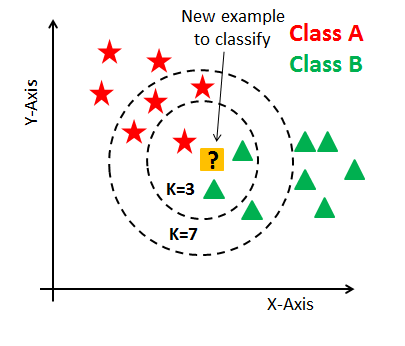

In [11]:
# решение без циклов
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
        
    def fit(self, X, y):
        self.X = X # объект – тренировочная выборка
        self.y = y # объект – предсказанные значения по тренировочной выборке
    
    def predict(self, X):
        def Pred (X_test: np.array) -> int:
            ''' 
            Функция, которая для каждой пары координат в тестовой выборке (X_test)
            считает евклидово расстояниие, находит по нему k ближайжих соседей 
            и возвращает наиболее часто встречающееся предсказанное значение для 
            k ближайжих соседей   
            '''
            # расчет расстояния (евклидова метрика)
            evc_distance = np.sqrt(np.sum((X_test - self.X) ** 2, axis=1))
            
            # к каждому расстоянию прикрепляем соответствующее предсказанное значение (self.y)
            # Сортируем по возрастанию расстояния – первый элемент с наименьшим расстоянием
            # И помещаем все в список
            list_dist_pred = list(sorted(zip(evc_distance, self.y))) 
            k_n = list_dist_pred[:self.k] # берем ровно k наиближайших соседей (индексы от 0 до k-1)
            
            # берем все предсказанные значения 
            # (второй элемент каждого списка внутри массива, то есть вторая колонка в матрце k_n)
            neighbors = np.array(k_n)[:, 1] 
            
            # считаем, сколько раз каждое предсказание встретилось у k соседей
            # и возваращем то предсказанное значение, которое чаще всего встретилось 
            return max(Counter(neighbors))
        
        # применяем функцию Pred для кажого элемента тестовой выборки (Х) 
        # -> выводим массив из предсказанных значений для тестовой выборки (X_test)
        return (np.array(list(map(Pred, X)))) 

In [12]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [13]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [14]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [15]:
print(f"Amount of missing vaues: {data.isna().sum().sum()}")

Amount of missing vaues: 0


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [16]:
print("Бессмысленным столбцом является столбец под названием 'Unnamed: 0' => удалим его из таблицы")
data = data.drop("Unnamed: 0", axis=1)
data.head(5)

Бессмысленным столбцом является столбец под названием 'Unnamed: 0' => удалим его из таблицы


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [17]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


C целевой переменной больше всего коррелируют такие признаки, как:
- каратность (carat) (Cor = 0.921591)
- длина бриллианта (x) (Cor = 0.884435)
- ширина бриллианта (y) (Cor = 0.865421)
- глубина бриллианта (z) (Cor = 0.861249)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [18]:
data.dtypes
# переменные типа "object" являются категориальными

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [19]:
# создаем фиктивные переменные для трех категориальных признаков
data = pd.get_dummies(data, columns = ['cut', 'color', 'clarity']) 
data.head(10)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,0.24,62.3,57.0,336,3.95,3.98,2.47,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,0.26,61.9,55.0,337,4.07,4.11,2.53,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0.22,65.1,61.0,337,3.87,3.78,2.49,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.23,59.4,61.0,338,4.00,4.05,2.39,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop("price", axis=1), # все колонки, кроме цены
                                                    data["price"],# только колонка с ценой
                                                    test_size = 0.3, 
                                                   random_state=26)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [22]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Среднеквадратичная ошибка на тренировочной выборке:", 
      np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train)))
     )

print("Среднеквадратичная ошибка на тестовой выборке:", 
      np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
     )

Среднеквадратичная ошибка на тренировочной выборке: 1127.9902623469138
Среднеквадратичная ошибка на тестовой выборке: 1137.037681048943


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [23]:
# для удобства выведем кортежи, где первый элемент - название признака, второй - оценка коэффциента
print(*list(zip(data.columns, model.coef_)), sep="\n") 

('carat', 5336.99336607263)
('depth', -70.06895528997516)
('table', -58.55509702911424)
('price', -1149.2443854454386)
('x', 164.42239590352926)
('y', -167.70259357243873)
('z', -120.93444092876916)
('cut_Fair', -43.60812650995938)
('cut_Good', 52.390343309849385)
('cut_Ideal', 14.707929741045136)
('cut_Premium', 1.7806486977684473)
('cut_Very Good', 212.2665479931719)
('color_D', 156.65192173229394)
('color_E', 137.37518989302083)
('color_F', 60.9583658401709)
('color_G', -128.26652720209717)
('color_H', -251.90482749596944)
('color_I', -389.9514269701435)
('color_J', -461.0734188871595)
('clarity_I1', 239.35462512269973)
('clarity_IF', -146.70098050977123)
('clarity_SI1', -494.386743975209)
('clarity_SI2', 204.52776500831368)
('clarity_VS1', 107.27594085739196)
('clarity_VS2', 250.86338260946238)
('clarity_VVS1', 270.95016213157743)


Можно увидеть одну вещетсвенную переменную, оценка коэффициента которой по модулю на порядок превышают оценки прочих вещественных переменных:
- каратность (carat) (koef = 5336.99336607263)


Остальные переменные не превышают по модулю значения равного 500.
Среди них по модулю максимальны следующие: 
- 'clarity_SI1' (koef = -494.386743975209)
- 'color_J' (koef = -461.0734188871595)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [24]:
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(10).fit(X_train, y_train)
print(*list(zip(data.columns, ls.coef_)), sep="\n")

('carat', 4874.619754605298)
('depth', -39.25342142265464)
('table', -45.864866115645704)
('price', -548.7234848983778)
('x', -0.0)
('y', -162.84660084130684)
('z', -123.41004471496775)
('cut_Fair', -43.56487447313327)
('cut_Good', 43.73198922624154)
('cut_Ideal', 0.0)
('cut_Premium', -0.0)
('cut_Very Good', 145.0114866108249)
('color_D', 83.25487358594245)
('color_E', 62.737934693246444)
('color_F', -0.0)
('color_G', -174.67584891521176)
('color_H', -282.737232274621)
('color_I', -407.17548651537885)
('color_J', -479.33426886743047)
('clarity_I1', 186.4469913326504)
('clarity_IF', -258.21347234214574)
('clarity_SI1', -583.1821428068542)
('clarity_SI2', 99.13233292410999)
('clarity_VS1', -0.0)
('clarity_VS2', 180.66419098985017)
('clarity_VVS1', 189.0408718032316)


In [25]:
rdg = Ridge(10).fit(X_train, y_train)
print(*list(zip(data.columns, rdg.coef_)), sep="\n")

('carat', 5298.489021198245)
('depth', -66.1698554338935)
('table', -58.29881055863856)
('price', -1081.7295075665422)
('x', 149.45846478739)
('y', -182.80741511482526)
('z', -121.27571764250449)
('cut_Fair', -43.63765000407844)
('cut_Good', 52.45025262292565)
('cut_Ideal', 14.41814216031041)
('cut_Premium', 2.170897111136285)
('cut_Very Good', 212.00747858535277)
('color_D', 156.44078897223207)
('color_E', 136.9129095335156)
('color_F', 60.67219004760254)
('color_G', -128.0504233861442)
('color_H', -251.24381715321024)
('color_I', -389.11754991033007)
('color_J', -460.6598156756216)
('clarity_I1', 239.73650810285358)
('clarity_IF', -147.25809139647072)
('clarity_SI1', -494.286959263398)
('clarity_SI2', 204.34879362372476)
('clarity_VS1', 107.12306274514465)
('clarity_VS2', 251.34840748635742)
('clarity_VVS1', 271.25596898806606)


Веса уменьшились. Где-то наблюдается более сущестсвенное уменьшение, но в целом нельзя сказать, что веса очень сильно уменьшились. Однако некоторые признаки занулились (в L1), что говорит об изначальном наличии мультиколлинеарности в модели. Об этом также говорят высокие коэффициенты корреляции между признаками, однако не сильно снижение весов говорит о том, что проблема мультиколлинеарности проявлялась в изначальной регрессии не очень сильно, но все-таки проявлялась. 

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [26]:
from sklearn.linear_model import Lasso, Ridge
# вектор оценок коэффициентов для L1 при разных параметрах регуляризации
vector_ls = np.array([Lasso(0.1).fit(X_train, y_train).coef_,
                  Lasso(1).fit(X_train, y_train).coef_,
                  Lasso(10).fit(X_train, y_train).coef_,
                  Lasso(100).fit(X_train, y_train).coef_,
                  Lasso(200).fit(X_train, y_train).coef_]
                 )
# вектор оценок коэффициентов для L2 при разных параметрах регуляризации
vector_rdg = np.array([Ridge(0.1).fit(X_train, y_train).coef_,
                  Ridge(1).fit(X_train, y_train).coef_,
                  Ridge(10).fit(X_train, y_train).coef_,
                  Ridge(100).fit(X_train, y_train).coef_,
                  Ridge(200).fit(X_train, y_train).coef_]
                 )


/Users/kseniast/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.460e+08, tolerance: 6.009e+07
  model = cd_fast.enet_coordinate_descent(


In [27]:
a = [0.1, 1, 10, 100, 200]
vec_norm_ls = np.array([np.linalg.norm(i) for i in vector_ls])
vec_norm_rdg = np.array([np.linalg.norm(i) for i in vector_rdg])

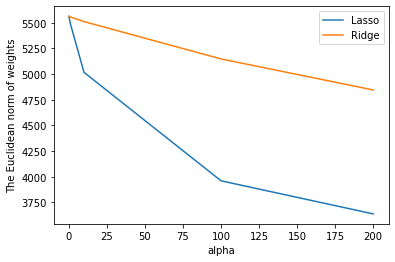

In [28]:
plt.plot(a, vec_norm_ls)
plt.plot(a, vec_norm_rdg)
plt.legend(["Lasso", "Ridge"])
plt.xlabel("alpha")
plt.ylabel("The Euclidean norm of weights")
plt.show()

- Агресивнее занижает веса Lasso-регрессия.
- Она занижает очень большие коэффициенты, то есть обнуляет неважные для модели признаки и оставляет только самые важные. Поэтому ее очень удобно использовать для отбора тех предикторов, вклад которых в объяснение зависимой переменной значим.


**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [29]:
from sklearn.linear_model import LassoCV
a = [0.1, 1, 10, 100, 200]
ls_cv = LassoCV(cv=5, alphas=a).fit(X_train, y_train)
lst = list(zip(ls_cv.alphas_, ls_cv.mse_path_.mean(axis= 1))) # вывод альфы и соотв. значения ср. ошибки
print(*lst, sep="\n")
print(f'Наибольшее качество дает модель с a = {min(lst, key=lambda x: x[-1])[0]}, так как ее средняя ошибка равная {min(lst, key=lambda x: x[-1])[1]} минимальна')

/Users/kseniast/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68329964.04571533, tolerance: 48092306.14222591
  model = cd_fast.enet_coordinate_descent_gram(
/Users/kseniast/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7548907101.753582, tolerance: 48092306.14222591
  model = cd_fast.enet_coordinate_descent_gram(


(200.0, 1944995.7869341453)
(100.0, 1526390.3794546549)
(10.0, 1288437.5943971549)
(1.0, 1278544.97087921)
(0.1, 1290567.3200741417)
Наибольшее качество дает модель с a = 1.0, так как ее средняя ошибка равная 1278544.97087921 минимальна


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [30]:
ls_fin = Lasso(1).fit(X_train, y_train)
print(*list(zip(data.columns, ls_fin.coef_)), sep="\n") # вывод названия колонки и коэффициента (для удобства)

('carat', 5290.65444859819)
('depth', -70.3152642526095)
('table', -57.57773780737628)
('price', -1009.8402409166588)
('x', 45.41936679966143)
('y', -144.0145214036495)
('z', -126.40458819655255)
('cut_Fair', -50.88810499507084)
('cut_Good', 38.69126271306397)
('cut_Ideal', 0.0)
('cut_Premium', -8.095308438111056)
('cut_Very Good', 160.95639792176289)
('color_D', 97.88866043975146)
('color_E', 78.46000195390322)
('color_F', -0.0)
('color_G', -181.3236542830843)
('color_H', -295.14640928590717)
('color_I', -421.55963506009954)
('color_J', -490.27667741323125)
('clarity_I1', 192.68783653165605)
('clarity_IF', -256.9601390573146)
('clarity_SI1', -590.6736793785626)
('clarity_SI2', 111.52279461722487)
('clarity_VS1', -0.0)
('clarity_VS2', 185.69394457984677)
('clarity_VVS1', 195.10676194374378)


Неинформативными признаками являются те признаки, чей вес моделью зануляется. В данном случае таковыми являются идеальная огранка бриллианта, качетсво цвета F, чистота уровня VS1. Они являются частью исходных номинальных переменных, поэтому по отдельности данные градации не значимы (а вот в совокупности с другими зависимость имеется (см. далее))

Наиболее информативным признаком является каратность, его вес во много раз больше, чем веса остальных признаков - она объясняет 85% дисперсии зависимой переменной (см. код ниже). И это логично - чем больше каратов в бриллианте, тем выше его стоимость – и это основной критерий в принципе стоимостной оценки бриллиантов.

Значимым предиктором также является цвет (совокупность всех градаций) – чем лучше цвет (от J до D), тем выше будет цена – наблюдается положительная зависимость.

In [31]:
# расчет R^2 – просто, чтобы показать, что этот признак самый значимый
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts =  train_test_split(data[["carat"]], 
                                           data["price"], 
                                           test_size = 0.3,
                                           random_state=0)

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_ts = scaler.transform(X_ts)

print(f'R^2 для признака "каратность": {Lasso(1).fit(X_tr, y_tr).score(X_tr, y_tr)}')

R^2 для признака "каратность": 0.8486187179278339


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [32]:
from sklearn import metrics
print(f'Среднеквадратичная ошибка (Lasso-регрессии): {np.sqrt(metrics.mean_squared_error(y_test, ls_fin.predict(X_test)))}')
print(f'Среднеквадратичная ошибка (классическая): {1137.037681048943 }')

Среднеквадратичная ошибка (Lasso-регрессии): 1135.1773048995788
Среднеквадратичная ошибка (классическая): 1137.037681048943


Различия в ошибке есть, ошибка в моделм c Lasso-регрессией меньше на 2, чем в классической модели.

Так как Lasso-регрессия позволяет убирать неинформативные признаки или сильно коррелированные признаки (или сильно занижать их значение), то в модели остается более релевантный набор переменных, чем в классической версии, что и уменьшает ошибку на выборке